<a href="https://colab.research.google.com/github/mcfatbeard57/Hands-On-ML-Tensor-FLow/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LR
Chapter 4 Logistic Regression

estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

**Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if θT · x is positive, and 0 if it is negative.**


## Training the Cost fxn
---



In [10]:
# This cost function makes sense because – log(t) grows very large when t approaches 0, 
# so the cost will be large if the model estimates a probability close to 0 for a positive instance, 
# and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand,
#  – log(t) is close to 0 when t is close to 1, 
#  so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, 
#  which is precisely what we want.

In [8]:
# this cost function is convex

In [2]:
import numpy as np

In [6]:
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())
# ['data', 'target_names', 'feature_names', 'target', 'DESCR']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

In [4]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

 **The hyperparameter controlling the regularization strength of a
Scikit-Learn LogisticRegression model is not alpha (as in other
linear models), but its inverse: C. The higher the value of C, the less
the model is regularized.**

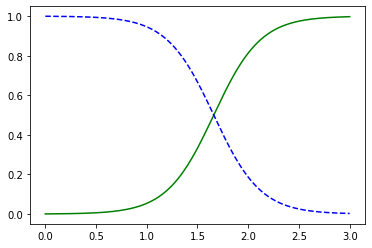

In [7]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
# + more Matplotlib code to make the image look pretty

# Softmax Regression

support multiple classes directly,
without having to train and combine multiple binary classifiers

each class has its own dedicated parameter vector θk.

In [11]:
# Just like the Logistic Regression classifier, the Softmax Regression classifier predicts
# the class with the highest estimated probability (which is simply the class with the
# highest score),

**The Softmax Regression classifier predicts only one class at a time
(i.e., it is multiclass, not multioutput) so it should be used only with
mutually exclusive classes such as different types of plants. You
cannot use it to recognize multiple people in one picture.**

training objective is to have a model that estimates a high
probability for the target class (and consequently a low probability for the other
classes).

In [12]:
# cross entropy penalizes the model when it estimates
# a low probability for a target class.

In [13]:
# set the multi_class hyperparameter to "multinomial"
# solver that supports Softmax Regression, such as the "lbfgs" solver

In [14]:
# applies ℓ2 regularization by default, which you can
# control using the hyperparameter C.

In [15]:
X = iris["data"][:, (2, 3)] # petal length, petal width
y = iris["target"]
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)